Linear Regression
Using a Data set of a Portuguse banks telemarketing campain/n
Citation at bottom

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
dfLinear = pd.read_csv("data/bank.csv", sep=';')
print(type(dfLinear))
dfLinear.head()

<class 'pandas.core.frame.DataFrame'>


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
print(dfLinear.head)

<bound method NDFrame.head of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  durati

In [4]:
#print("Rows ",len(dfLinear))
#print("Columns ",len(dfLinear.columns))
print(dfLinear.shape)

(4521, 17)


In [5]:
dfLinear.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Clean the data - Details such as Duration of the call cant be known before making the call so are not usefull for the purpose of predicting if a call should be prioritised or not.
Change Binary Yes/No into 1/0

In [6]:
dfLinearClean = dfLinear.drop(columns = 'duration')
dfLinearClean["default"] = dfLinearClean["default"].map({"yes": 1, "no": 0})
dfLinearClean["housing"] = dfLinearClean["housing"].map({"yes": 1, "no": 0})
dfLinearClean["loan"] = dfLinearClean["loan"].map({"yes": 1, "no": 0})
dfLinearClean["y"] = dfLinearClean["y"].map({"yes": 1, "no": 0})
dfLinearClean["month"] = dfLinearClean["month"].map({"jan": 1, "feb": 2,"mar": 3, "apr": 4,"may":5, "jun": 6,"jul": 7, "aug": 8,"sep": 9, "oct": 10,"nov": 11, "dec": 12})
dfLinearClean["education"] = dfLinearClean["education"].map({"unknown":-1,"primary":1,"secondary":2,"tertiary":3 })
dfLinearClean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,1,0,1787,0,0,cellular,19,10,1,-1,0,unknown,0
1,33,services,married,2,0,4789,1,1,cellular,11,5,1,339,4,failure,0
2,35,management,single,3,0,1350,1,0,cellular,16,4,1,330,1,failure,0
3,30,management,married,3,0,1476,1,1,unknown,3,6,4,-1,0,unknown,0
4,59,blue-collar,married,2,0,0,1,0,unknown,5,5,1,-1,0,unknown,0


In [7]:
#onehot encoding the results
dfLinearCleanOneHot = pd.get_dummies(dfLinearClean, dtype=int)

In [8]:
print(dfLinearCleanOneHot.head())
dfLinearCleanOneHot.corr()

   age  education  default  balance  housing  loan  day  month  campaign  \
0   30          1        0     1787        0     0   19     10         1   
1   33          2        0     4789        1     1   11      5         1   
2   35          3        0     1350        1     0   16      4         1   
3   30          3        0     1476        1     1    3      6         4   
4   59          2        0        0        1     0    5      5         1   

   pdays  ...  marital_divorced  marital_married  marital_single  \
0     -1  ...                 0                1               0   
1    339  ...                 0                1               0   
2    330  ...                 0                0               1   
3     -1  ...                 0                1               0   
4     -1  ...                 0                1               0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 1                  0                0  

,age,education,default,balance,housing,loan,day,month,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.189698,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,0.073764,-0.005148,-0.008894,...,0.148043,0.275139,-0.410768,-0.061794,0.183060,-0.035125,0.012693,-0.026179,0.048626,-0.017414
education,-0.189698,1.000000,-0.007344,0.026578,-0.015684,0.028530,0.011473,0.071631,0.021121,0.004925,...,-0.006816,-0.109954,0.126041,0.159260,-0.071900,-0.128539,0.021188,0.016944,-0.006113,-0.023474
default,-0.017885,-0.007344,1.000000,-0.070886,0.006881,0.063994,-0.013261,0.008917,-0.012348,-0.026317,...,0.048878,-0.039031,0.007391,-0.002449,-0.021119,0.014151,-0.040055,0.005801,-0.022410,0.038997
balance,0.083820,0.026578,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,0.099872,-0.009976,0.009437,...,-0.036284,0.017158,0.007525,0.000240,0.034025,-0.018892,0.025719,0.000129,0.029999,-0.033843
housing,-0.193888,-0.015684,0.006881,-0.050227,1.000000,0.018451,-0.031291,-0.170922,-0.003574,0.116893,...,-0.001197,0.038432,-0.041449,-0.164820,-0.075859,0.215344,0.094246,0.046986,-0.088504,-0.062805
loan,-0.011250,0.028530,0.063994,-0.071349,0.018451,1.000000,-0.004879,0.039226,0.017120,-0.031086,...,0.017798,0.032272,-0.048496,0.008159,-0.004945,-0.005894,-0.011652,-0.018397,-0.050643,0.041107
day,-0.017853,0.011473,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,0.080436,0.160706,-0.094352,...,-0.007121,-0.001438,0.006769,0.017850,0.053527,-0.048143,-0.064235,-0.021062,-0.027720,0.075100
month,0.073764,0.071631,0.008917,0.099872,-0.170922,0.039226,0.080436,1.000000,0.059214,-0.112003,...,0.011278,0.048739,-0.061882,0.171744,0.019327,-0.191676,-0.074118,-0.045039,0.022617,0.074025
campaign,-0.005148,0.021121,-0.012348,-0.009976,-0.003574,0.017120,0.160706,0.059214,1.000000,-0.093137,...,-0.022157,0.022000,-0.008093,-0.018435,0.026571,0.004882,-0.094021,-0.030435,-0.058268,0.117375
pdays,-0.008894,0.004925,-0.026317,0.009437,0.116893,-0.031086,-0.094352,-0.112003,-0.093137,1.000000,...,-0.003411,-0.016537,0.020693,0.223347,0.019660,-0.246270,0.708380,0.382970,0.212188,-0.867713


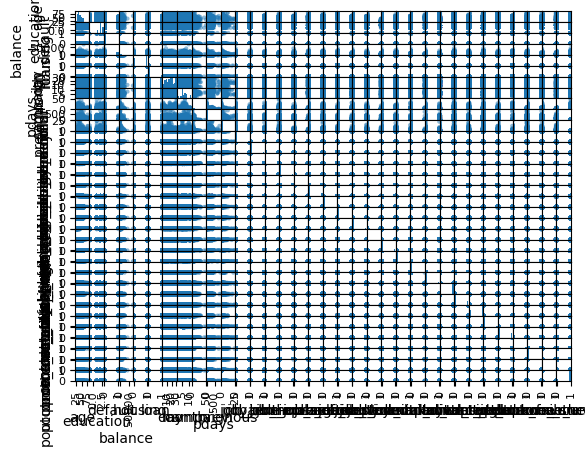

<Figure size 640x480 with 0 Axes>

In [9]:
scatter_matrix(dfLinearCleanOneHot)
plt.show()
plt.savefig('plots/dfLinearCleanOneHotScatter.png')

this figure has too much information to be easily read

In [10]:
print(dfLinearClean.head)
dfLinearSimple = dfLinearClean.drop(columns=['job','marital','poutcome','contact'])
dfLinearSimple.corr()

<bound method NDFrame.head of       age            job  marital  education  default  balance  housing  loan  \
0      30     unemployed  married          1        0     1787        0     0   
1      33       services  married          2        0     4789        1     1   
2      35     management   single          3        0     1350        1     0   
3      30     management  married          3        0     1476        1     1   
4      59    blue-collar  married          2        0        0        1     0   
...   ...            ...      ...        ...      ...      ...      ...   ...   
4516   33       services  married          2        0     -333        1     0   
4517   57  self-employed  married          3        1    -3313        1     1   
4518   57     technician  married          2        0      295        0     0   
4519   28    blue-collar  married          2        0     1137        0     0   
4520   44   entrepreneur   single          3        0     1136        1     1  

,age,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
age,1.000000,-0.189698,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,0.073764,-0.005148,-0.008894,-0.003511,0.045092
education,-0.189698,1.000000,-0.007344,0.026578,-0.015684,0.028530,0.011473,0.071631,0.021121,0.004925,0.024486,0.045286
default,-0.017885,-0.007344,1.000000,-0.070886,0.006881,0.063994,-0.013261,0.008917,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,0.026578,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,0.099872,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,-0.015684,0.006881,-0.050227,1.000000,0.018451,-0.031291,-0.170922,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,0.028530,0.063994,-0.071349,0.018451,1.000000,-0.004879,0.039226,0.017120,-0.031086,-0.022115,-0.070517
day,-0.017853,0.011473,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,0.080436,0.160706,-0.094352,-0.059114,-0.011244
month,0.073764,0.071631,0.008917,0.099872,-0.170922,0.039226,0.080436,1.000000,0.059214,-0.112003,-0.037410,0.023335
campaign,-0.005148,0.021121,-0.012348,-0.009976,-0.003574,0.017120,0.160706,0.059214,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.004925,-0.026317,0.009437,0.116893,-0.031086,-0.094352,-0.112003,-0.093137,1.000000,0.577562,0.104087


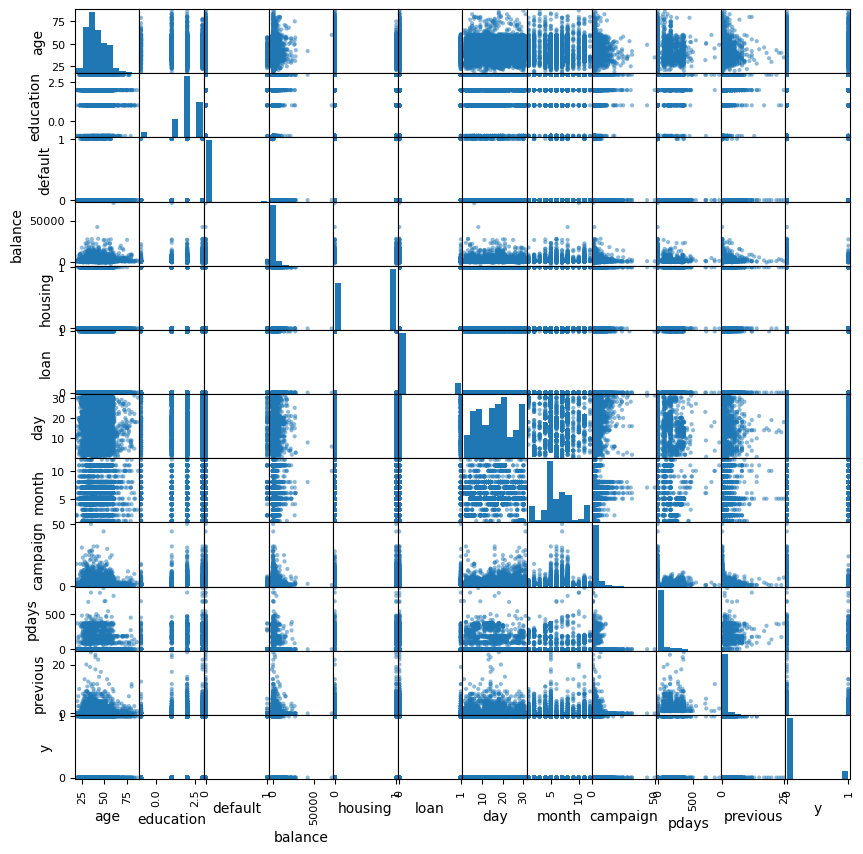

<Figure size 640x480 with 0 Axes>

In [11]:
scatter_matrix(dfLinearSimple,figsize=(10, 10))
plt.show()
plt.savefig('plots/dfLinearSimple.png')

In [12]:
#now SuperSimple
dfLinearSuperSimple = dfLinearSimple.drop(columns=['month','day'])
dfLinearSuperSimple.corr()

,age,education,default,balance,housing,loan,campaign,pdays,previous,y
age,1.000000,-0.189698,-0.017885,0.083820,-0.193888,-0.011250,-0.005148,-0.008894,-0.003511,0.045092
education,-0.189698,1.000000,-0.007344,0.026578,-0.015684,0.028530,0.021121,0.004925,0.024486,0.045286
default,-0.017885,-0.007344,1.000000,-0.070886,0.006881,0.063994,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,0.026578,-0.070886,1.000000,-0.050227,-0.071349,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,-0.015684,0.006881,-0.050227,1.000000,0.018451,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,0.028530,0.063994,-0.071349,0.018451,1.000000,0.017120,-0.031086,-0.022115,-0.070517
campaign,-0.005148,0.021121,-0.012348,-0.009976,-0.003574,0.017120,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.004925,-0.026317,0.009437,0.116893,-0.031086,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.024486,-0.026656,0.026196,0.038621,-0.022115,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.045286,0.001303,0.017905,-0.104683,-0.070517,-0.061147,0.104087,0.116714,1.000000


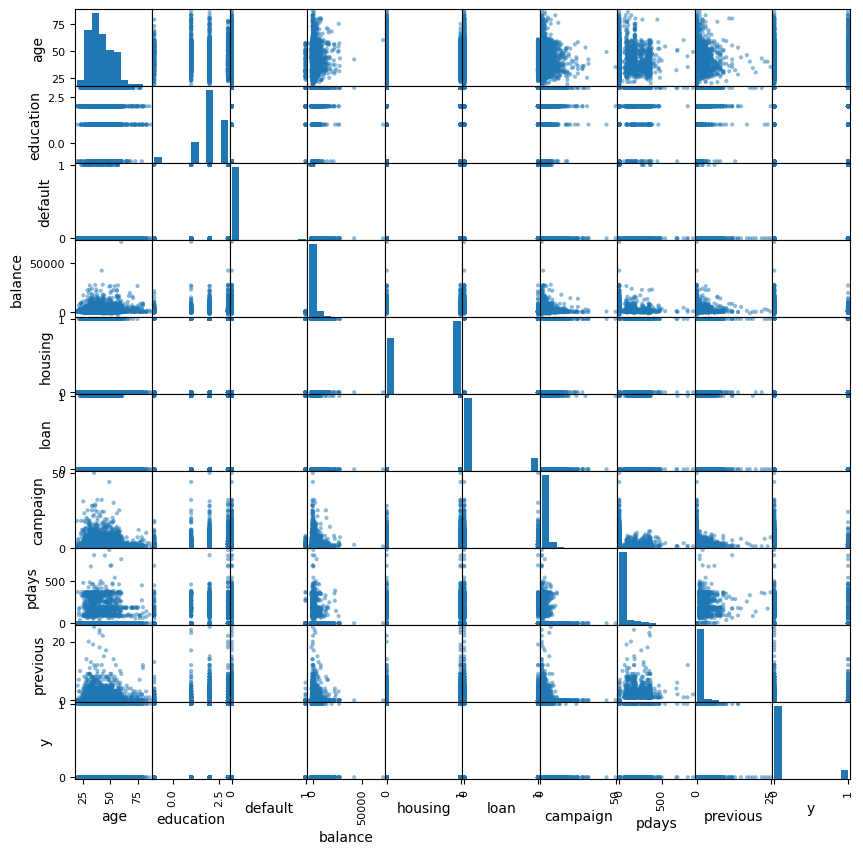

<Figure size 640x480 with 0 Axes>

In [13]:
scatter_matrix(dfLinearSuperSimple,figsize=(10, 10))
plt.show()
plt.savefig('plots/dfLinearSuperSimple.png')

###Prepare the data

In [19]:
Xfull= dfLinearCleanOneHot.drop(columns = ['y'])
y = dfLinearCleanOneHot.y
Xfull_train,Xfull_test,y_train,y_test=train_test_split(Xfull,y,random_state=1)

###Model building

In [21]:
modelF = LinearRegression()
modelF.fit(Xfull_train,y_train)

print('intercept:', modelF.intercept_)
print('slopes:', modelF.coef_)
print('R squared:', modelF.score(Xfull_train,y_train))

intercept: 0.25738278808237236
slopes: [ 6.38368341e-04  1.39157180e-02  2.50063034e-02  1.07746212e-06
 -2.64786862e-02 -4.20741163e-02 -4.09501147e-04 -2.23948489e-03
 -2.16134544e-03 -1.57329212e-05  3.92156941e-03 -1.74144146e-02
 -2.32962051e-02 -4.49141533e-02  5.20309121e-03 -6.74227935e-03
  9.08062102e-02 -2.94281064e-02 -8.37007520e-03  2.42285727e-02
 -2.73476803e-02 -4.52902993e-02  8.25653394e-02  1.76651367e-02
 -2.49875516e-02  7.32241480e-03  1.74745470e-02  1.98433630e-02
 -3.73179100e-02 -1.41695994e-01 -7.32872939e-02  3.69256140e-01
 -1.54272853e-01]
R squared: 0.12671774213883846


In [23]:
yhat=modelF.predict(Xfull_test)
print(mean_squared_error(y_test,yhat,squared=False))

0.3199838106545203


In [30]:
#cross validation
scores = cross_val_score(modelF,Xfull_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.10960888 0.13998915 0.07915467 0.08896726 0.09602836]
0.10274966520552362


In [31]:
dfLinearCleanOneHot.head()

,age,education,default,balance,housing,loan,day,month,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,0,1787,0,0,19,10,1,-1,...,0,1,0,1,0,0,0,0,0,1
1,33,2,0,4789,1,1,11,5,1,339,...,0,1,0,1,0,0,1,0,0,0
2,35,3,0,1350,1,0,16,4,1,330,...,0,0,1,1,0,0,1,0,0,0
3,30,3,0,1476,1,1,3,6,4,-1,...,0,1,0,0,0,1,0,0,0,1
4,59,2,0,0,1,0,5,5,1,-1,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
#making a prediction
newData=[[72,20,85]]
newDF=pd.DataFrame(newData, columns=['AirFlow','WaterTemp','AcidConc'])

print(newDF)


Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None
